<a href="https://colab.research.google.com/github/AnniaBenitez/Cores_MOD3_AML/blob/main/CORE8_BreastCancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importar librerías
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd
import os
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/breast-cancer-wisconsin-data")

print("Path to dataset files:", path)
files = os.listdir(path)
print("Archivos en la carpeta:", files)
path = os.path.join(path, files[0])
print("Path to dataset file:", path)

100%|██████████| 48.6k/48.6k [00:00<00:00, 21.3MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/uciml/breast-cancer-wisconsin-data/versions/2
Archivos en la carpeta: ['data.csv']
Path to dataset file: /root/.cache/kagglehub/datasets/uciml/breast-cancer-wisconsin-data/versions/2/data.csv


In [3]:
# Cargar datos
df = pd.read_csv(path)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
# Ver los primeros datos
print(df.head())

# Resumen de las columnas y valores nulos
print("Resumen de datos:")
print(df.info())

# Verificar valores nulos
print("\nValores nulos por columna:")
print(df.isnull().sum())

# Eliminar columnas innecesarias, como "id" y "Unnamed: 32" (completamente nula)
df = df.drop(columns=['id', 'Unnamed: 32'])

# Resumen estadístico de las variables numéricas
print("\nResumen estadístico:")
print(df.describe())


         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

In [6]:
# Convertir la variable "diagnosis" en valores binarios: M=1 (Maligno), B=0 (Benigno)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Separar características (X) y la variable objetivo (y)
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

# Normalización de las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convertir a DataFrame para facilitar la interpretación
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)


In [7]:
from sklearn.model_selection import train_test_split

# División del dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Verificar dimensiones de los conjuntos
print(f"Datos de entrenamiento: {X_train.shape}, {y_train.shape}")
print(f"Datos de prueba: {X_test.shape}, {y_test.shape}")


Datos de entrenamiento: (455, 30), (455,)
Datos de prueba: (114, 30), (114,)


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Crear el modelo MLP
model = Sequential([
    Dense(32, input_dim=X_train.shape[1], activation='relu'),  # Capa oculta con 32 neuronas
    Dense(1, activation='sigmoid')  # Capa de salida con función sigmoide
])

# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Resumen del modelo
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,025 (4.00 KB)

 Trainable params: 1,025 (4.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.4844 - loss: 0.8104 - val_accuracy: 0.7807 - val_loss: 0.4481
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8490 - loss: 0.3691 - val_accuracy: 0.9123 - val_loss: 0.2713
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9183 - loss: 0.2260 - val_accuracy: 0.9561 - val_loss: 0.1923
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9428 - loss: 0.1756 - val_accuracy: 0.9737 - val_loss: 0.1534
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9594 - loss: 0.1411 - val_accuracy: 0.9737 - val_loss: 0.1286
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9636 - loss: 0.1167 - val_accuracy: 0.9737 - val_loss: 0.1133
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9636 - loss: 0.1052 - val_accuracy: 0.9737 - val_loss: 0.1024
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9838 - loss: 0.0865 - val_accuracy: 0.9737 - val_los

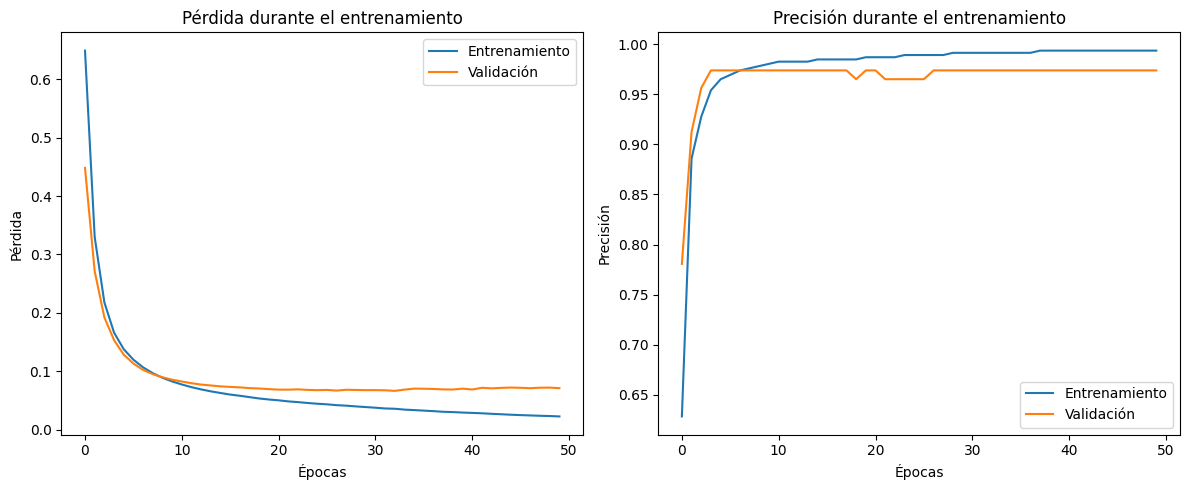

In [9]:
# Entrenar el modelo
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=16, verbose=1)

# Visualizar las curvas de pérdida y precisión
plt.figure(figsize=(12, 5))

# Curva de pérdida
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

# Curva de precisión
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.tight_layout()
plt.show()


Pérdida en prueba: 0.0712
Precisión en prueba: 0.9737
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


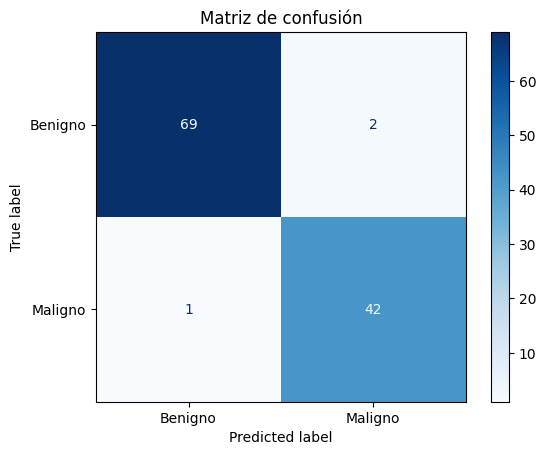


Reporte de clasificación:
              precision    recall  f1-score   support

     Benigno       0.99      0.97      0.98        71
     Maligno       0.95      0.98      0.97        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [10]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Pérdida en prueba: {loss:.4f}")
print(f"Precisión en prueba: {accuracy:.4f}")

# Generar predicciones
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Benigno', 'Maligno'])
disp.plot(cmap='Blues')
plt.title('Matriz de confusión')
plt.show()

# Reporte de métricas
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred, target_names=['Benigno', 'Maligno']))
